# いつも幸せな国ってあるの？ #

粟野翔　1254810059

私は「幸福度が安定している国」と「変動が大きい国」を比較してみたいと思いました。  
幸福度が低いがそんなに変化がない、幸福度が高いのに上がり下がりが激しいのはどんな国でしょうか？

In [1]:
import pandas as pd

df = pd.read_csv("world_happiness_report.csv")
print(df.head())


   Unnamed: 0      Country          Region  Happiness Rank  Happiness Score  \
0           0  Switzerland  Western Europe             1.0            7.587   
1           1      Iceland  Western Europe             2.0            7.561   
2           2      Denmark  Western Europe             3.0            7.527   
3           3       Norway  Western Europe             4.0            7.522   
4           4       Canada   North America             5.0            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877          

In [14]:
# データの形状を確認（行数、列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [15]:
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


# 国選択 # 

日本、イギリス、オーストラリア、アメリカに絞って分析をします！

In [11]:
countries = ["Japan", "United Kingdom", "Australia", "United States"]

df_countries = df[df["Country"].isin(countries)]
df_countries.head()


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
9,9,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015
14,14,United States,North America,15.0,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011,2015
20,20,United Kingdom,Western Europe,21.0,6.867,0.01866,1.26637,1.28548,0.90943,0.59625,0.32067,0.51912,1.96994,2015
45,45,Japan,Eastern Asia,46.0,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435,2015
166,166,Australia,Australia and New Zealand,9.0,7.313,NaN,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650,2016


# 幸福度の「平均」と「標準偏差」を計算 #

meanが幸福度の平均、stdが標準偏差です

In [17]:
stats = df_countries.groupby("Country")["Happiness Score"].agg(["mean", "std"])
print(stats)


                  mean       std
Country                         
Australia       7.2985  0.020506
Japan           5.9540  0.046669
United Kingdom  6.7960  0.100409
United States   7.1115  0.010607


# どのように幸福度は推移しているか？ #  
2015～2022までの幸福度を棒グラフで示します。これにより幸福度の高さではなく幸福度にどのくらい振れ幅があるのかを調べられます。

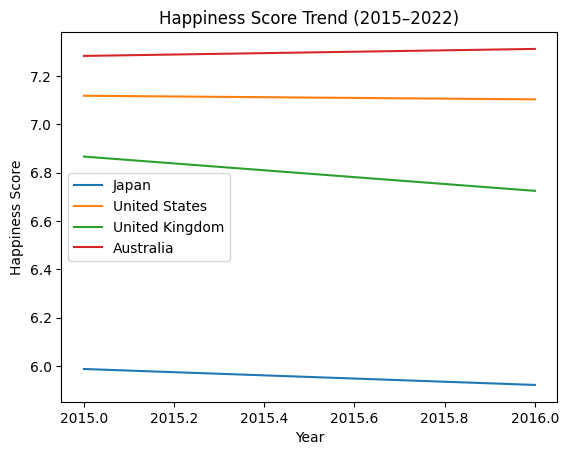

In [18]:
plt.figure()
for country in countries:
    data = df_countries[df_countries["Country"] == country]
    plt.plot(data["year"], data["Happiness Score"], label=country)

plt.title("Happiness Score Trend (2015–2022)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.show()


年によっておそらくデータが欠損しているため、折れ線グラフは各国でデータが存在する年のみを表示しています。

オーストラリアは幸福度があがっています。アメリカは横ばい、日本とイギリスは下がっていますね。

# 幸福度の安定性比較 # 

標準偏差だけを比較  

高い → 変動が大きい  

低い → 安定している

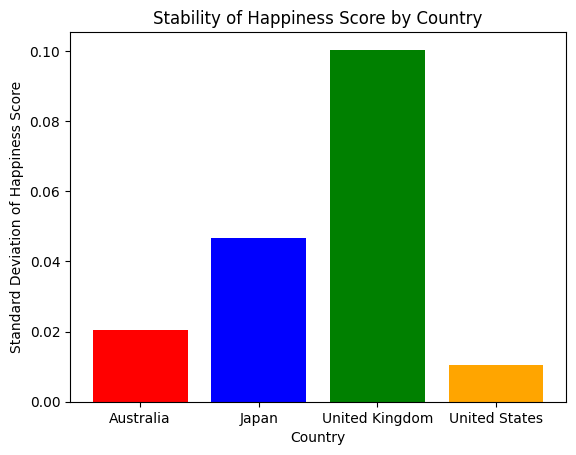

In [20]:
# 国ごとの色を指定
colors = {
    "Japan": "blue",
    "United States": "orange",
    "United Kingdom": "green",
    "Australia": "red"
}

plt.figure()

# 国の順番に対応する色リストを作成
bar_colors = [colors[country] for country in stats.index]

plt.bar(stats.index, stats["std"], color=bar_colors)

plt.title("Stability of Happiness Score by Country")
plt.xlabel("Country")
plt.ylabel("Standard Deviation of Happiness Score")
plt.show()


この結果が先程の棒グラフの結果を裏付けています。グラフの傾きが大きかったイギリスの数値が大きく、横ばいだったアメリカの数値が低くなっています。

# 散布図 #  
「幸福だが不安定」

「幸福度は低いが安定」  

を同時に視覚化

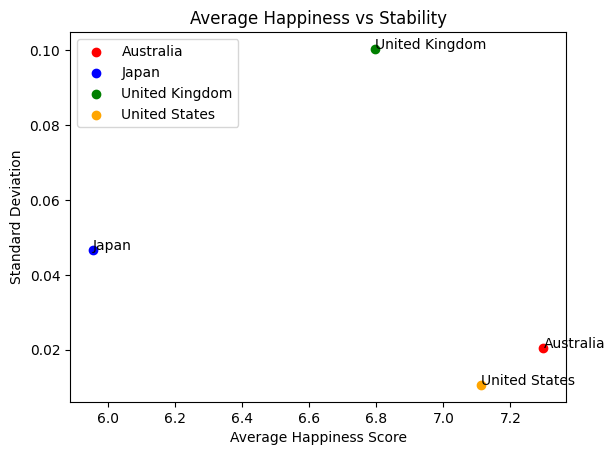

In [29]:
# 国ごとの色指定（前と同じ）
colors = {
    "Japan": "blue",
    "United States": "orange",
    "United Kingdom": "green",
    "Australia": "red"
}

plt.figure()

# 国ごとに1点ずつ描画
for country in stats.index:
    plt.scatter(
        stats.loc[country, "mean"],
        stats.loc[country, "std"],
        color=colors[country],
        label=country
    )
    # 点の横に国名を表示
    plt.text(
        stats.loc[country, "mean"],
        stats.loc[country, "std"],
        country
    )

plt.title("Average Happiness vs Stability")
plt.xlabel("Average Happiness Score")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()


#  結果 #  

これらの結果から幸福度が高くても年毎の変化が激しい国が存在することが分かった。日本は幸福度が低いが年毎の変化は小さい。これは日本の国としての変化が少ないからではないかと考える。発展途上国のように生活を大きく向上させるようなものはここ数年の日本に登場してないのではないか。イギリスの幸福度の変化が激しいのはどんな原因があるのか他の要因があると思います。